# Intro and outline
- A set of techniques applied to raw data to prepare it for analysis by machine learning models. It is done to ensure that data is clean, consistent and suitable for each model assumptions. Thus, we get the best performance from the model training.

## Importance
- ***Improves model accuracy***: Models trained on well-preprocessed data tend to make more accurate predictions; because they are free from inconsistences and errors.
- ***Enbsures Consistency***: Raw real data often has missing values, duplicates, or noise. preprocessing handles these errors.
- ***Speeds up the model convergence***: Proper scaling and normalization reduce computational requirements, helping models converge faster and optimizing training time.
- ***Enhances Generalization***: Preprocessing minimizes biases and improves the model's ability to generalize well on the new data, reducing the risk of overfitting. 

## Key steps in data preprocessing:
1. ***Data cleaning***:
    - Identifying and fixing, or removing errors.
    - Handling missing values.
    - Dealing with duplicates and outliers (i.e., extreme high/low values).
2. ***Data transformation***:
    - Converting data types
    - Encoding categorical data
    - Scaling or normalizing features to bring them to a comparable range
3. ***Feature selection and engineering***:
    - Selecting only the most relevant features, removing redundancies, and creating new features that add more power.
4. ***Data splitting***: 
    - Dividing data into training, validation, and test sets to evaluate model performance on unseen data.

# 1. Handling missing values:

In [2]:
import numpy as np
import pandas as pd
df = pd.DataFrame({
    "age":    [25, 30,  np.nan, 40, 35,  np.nan],         
    "income": [50000,  np.nan, 60000, 55000,  np.nan, 52000],
    "city":   ["Cairo","Giza",  np.nan, "Cairo","Giza",   np.nan],  
    "date":   pd.date_range("2024-01-01", periods=6, freq="D"),
    "temp":   [20.0,   np.nan, 21.5,    np.nan, 23.0,     24.0]   
})
df

,age,income,city,date,temp
0,25.0,50000.0,Cairo,2024-01-01,20.0
1,30.0,NaN,Giza,2024-01-02,NaN
2,NaN,60000.0,NaN,2024-01-03,21.5
3,40.0,55000.0,Cairo,2024-01-04,NaN
4,35.0,NaN,Giza,2024-01-05,23.0
5,NaN,52000.0,NaN,2024-01-06,24.0


## 1.1 Imputation

In [3]:
# mean imputation (numeric)
df_mean = df.copy()
df_mean["age"] = df_mean["age"].fillna(df_mean["age"].mean()) 

# Median imputation (numeric)
df_median = df.copy()
df_median["income"] = df_median["income"].fillna(df_median["income"].median())

# Mode imputation / Most-frequent (categorical)
df_mode = df.copy()
df_mode["city"] = df_mode["city"].fillna(df_mode["city"].mode()[0])

# Forward fill(ffill) — good for ordered/time data
df_ffill = df.sort_values("date").copy()
df_ffill["temp"] = df_ffill["temp"].ffill()

# Backward fill (bfill)
df_bfill = df.sort_values("date").copy()
df_bfill["temp"] = df_bfill["temp"].bfill()

In [4]:
print(f"df afer mean imputation:\n {df_mean} \n\n")
print(f"df afer median imputation:\n {df_median} \n\n")
print(f"df afer mode imputation:\n {df_mode} \n\n")
print(f"df afer forward fill imputation:\n {df_ffill} \n\n")
print(f"df afer backward fill imputation:\n {df_bfill} \n\n")

df afer mean imputation:
     age   income   city       date  temp
0  25.0  50000.0  Cairo 2024-01-01  20.0
1  30.0      NaN   Giza 2024-01-02   NaN
2  32.5  60000.0    NaN 2024-01-03  21.5
3  40.0  55000.0  Cairo 2024-01-04   NaN
4  35.0      NaN   Giza 2024-01-05  23.0
5  32.5  52000.0    NaN 2024-01-06  24.0 


df afer median imputation:
     age   income   city       date  temp
0  25.0  50000.0  Cairo 2024-01-01  20.0
1  30.0  53500.0   Giza 2024-01-02   NaN
2   NaN  60000.0    NaN 2024-01-03  21.5
3  40.0  55000.0  Cairo 2024-01-04   NaN
4  35.0  53500.0   Giza 2024-01-05  23.0
5   NaN  52000.0    NaN 2024-01-06  24.0 


df afer mode imputation:
     age   income   city       date  temp
0  25.0  50000.0  Cairo 2024-01-01  20.0
1  30.0      NaN   Giza 2024-01-02   NaN
2   NaN  60000.0  Cairo 2024-01-03  21.5
3  40.0  55000.0  Cairo 2024-01-04   NaN
4  35.0      NaN   Giza 2024-01-05  23.0
5   NaN  52000.0  Cairo 2024-01-06  24.0 


df afer forward fill imputation:
     age   income

### 1.2 Linear interpolation
![linear interpolation](images/linear_interpolation.PNG)

In [6]:
# simple linear along positional index
df_lin = df.sort_values("date").copy()
df_lin["temp_linear"] = df_lin["temp"].interpolate(method="linear")

In [7]:
print(f"df after simpler linear interpolation:\n {df_lin}")

df after simpler linear interpolation:
     age   income   city       date  temp  temp_linear
0  25.0  50000.0  Cairo 2024-01-01  20.0        20.00
1  30.0      NaN   Giza 2024-01-02   NaN        20.75
2   NaN  60000.0    NaN 2024-01-03  21.5        21.50
3  40.0  55000.0  Cairo 2024-01-04   NaN        22.25
4  35.0      NaN   Giza 2024-01-05  23.0        23.00
5   NaN  52000.0    NaN 2024-01-06  24.0        24.00


## 1.3 KNN Imputer
![KNN Imputer](images/knn_imputer.PNG)

In [8]:
from sklearn.impute import KNNImputer
df_knn = df.copy()
num_cols = ["age","income","temp"]
imputer = KNNImputer()
df_knn[num_cols] = imputer.fit_transform(df_knn[num_cols])

In [9]:
print(f"df after KNN imputer:\n {df_knn}")

df after KNN imputer:
          age   income   city       date    temp
0  25.000000  50000.0  Cairo 2024-01-01  20.000
1  30.000000  52500.0   Giza 2024-01-02  21.500
2  33.333333  60000.0    NaN 2024-01-03  21.500
3  40.000000  55000.0  Cairo 2024-01-04  22.125
4  35.000000  54250.0   Giza 2024-01-05  23.000
5  33.333333  52000.0    NaN 2024-01-06  24.000


# 2. Outliers handling

In [10]:
data = np.append(np.random.normal(50, 10, 100), [150, 160, 170]) 
#data
df = pd.DataFrame({'value': data})
print(df.head())

       value
0  44.547232
1  54.076490
2  53.764794
3  56.243020
4  50.561935


### Removing
#### 2.1 visualization --> BoxPlot

<Axes: ylabel='value'>

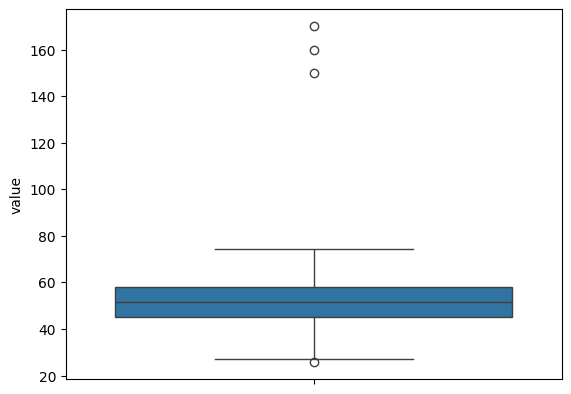

In [11]:
import seaborn as sns
sns.boxplot(df["value"])

#### 2.2 IQR (Inter Quartile Range)
![IQR](images/IQR.PNG)

In [12]:
Q1 = df["value"].quantile(0.25)
Q3 = df["value"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["value"] < lower_bound) | (df["value"] > upper_bound)]

In [13]:
print(f"Q1: {Q1}")
print(f"\nQ3: {Q3}")
print(f"\nIQR: = Q3 - Q1 = {IQR}")
print(f"\nlower bound = {lower_bound}")
print(f"\nupper bound = {upper_bound}")
print(f"\noutliers detected: \n{outliers}")

Q1: 45.25600378514923

Q3: 58.03304658212981

IQR: = Q3 - Q1 = 12.77704279698058

lower bound = 26.09043958967836

upper bound = 77.19861077760069

outliers detected: 
          value
83    25.680688
100  150.000000
101  160.000000
102  170.000000


In [14]:
# df without outliers
print(f"df shape before outliers removal:\n{df.shape}")
df_after = df[(df["value"] >= lower_bound) & (df["value"] <= upper_bound)]
print(f"df shape after outliers removal:\n{df_after.shape}")

df shape before outliers removal:
(103, 1)
df shape after outliers removal:
(99, 1)


#### 2.3 Z-score
![z_score](images/z_score.PNG)

In [15]:
df_zscore = df.copy()
df_zscore["z_scores"] = (df["value"] - (df["value"].mean())) / (df["value"].std())
print(f"df with the z_score of each value:\n{df_zscore.head()}")

df with the z_score of each value:
       value  z_scores
0  44.547232 -0.473012
1  54.076490 -0.011842
2  53.764794 -0.026926
3  56.243020  0.093008
4  50.561935 -0.181929


In [16]:
threshold = 2
df_outliers = df_zscore[df_zscore["z_scores"] >= threshold ]
print(f"outliers:\n {df_outliers}")

outliers:
      value  z_scores
100  150.0  4.630399
101  160.0  5.114352
102  170.0  5.598304


In [17]:
df_without_outliers = df_zscore[df_zscore["z_scores"] < threshold ]
print(f"df shape after outliers removal: {df_without_outliers.shape}")

df shape after outliers removal: (100, 2)


#### 2.4 Isolation forest
![isolation forest](images/isolation_forest.PNG)

In [18]:
from sklearn.ensemble import IsolationForest
df_if = df.copy()
x = df_if["value"].values.reshape(-1, 1)
iso = IsolationForest(contamination="auto", random_state=42)
iso.fit(x)

IsolationForest(random_state=42)

In [19]:
# predict: 1->inlier, -1-> outlier
labels = iso.predict(x)
print("Labels: ", labels)

Labels:  [ 1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1
  1  1 -1  1 -1 -1 -1]


In [20]:
#outliers
outliers_if = df_if[labels == -1]
# data without outliers
df_nooutliers = df_if[labels == 1]

print(f"Outliers:\n{outliers_if}")
print(f"\n\ndf after outliers removel:\n{df_nooutliers}")

Outliers:
          value
7     74.247611
17    26.945211
19    33.231400
25    37.279390
41    67.693596
49    40.525840
72    34.158223
74    71.207319
76    30.460119
78    36.806586
80    66.568927
83    25.680688
94    67.673905
95    36.549020
98    38.827993
100  150.000000
101  160.000000
102  170.000000


df after outliers removel:
        value
0   44.547232
1   54.076490
2   53.764794
3   56.243020
4   50.561935
..        ...
92  45.336786
93  65.373863
96  48.627426
97  63.156628
99  49.115466

[85 rows x 1 columns]


# 3. Transformation

In [21]:
print(f"original df:\n {df.sort_values("value", ascending=False).head(5)}")

original df:
           value
102  170.000000
101  160.000000
100  150.000000
7     74.247611
74    71.207319


In [22]:
df_trasnformed = df.copy()
# log transformation
df_trasnformed["value_log"] = np.log1p(df_trasnformed["value"])  
# Square-root transform --> (requires non-negative values; our data is positive)
df_trasnformed["value_sqrt"] = np.sqrt(df_trasnformed["value"])  
# Box-Cox transformation
from scipy.stats import boxcox, boxcox_normmax
lam = boxcox_normmax(df_trasnformed["value"].values)      # automatic lambda val.
df_trasnformed["value_boxcox"] = boxcox(df_trasnformed["value"].values, lam)
print(f"\nEstimated Box–Cox lambda: {lam:.3f}")


Estimated Box–Cox lambda: -0.777


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_morestats.py:1340: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  r, prob = _stats_py.pearsonr(xvals, yvals)


In [23]:
print("\nTop 5 values (original -> Transformed):")
top5 = df_trasnformed.sort_values("value", ascending=False).head(5)[["value","value_log", "value_sqrt", "value_boxcox"]]
print(top5)


Top 5 values (original -> Transformed):
          value  value_log  value_sqrt  value_boxcox
102  170.000000   5.141664   13.038405      1.262670
101  160.000000   5.081404   12.649111      1.261525
100  150.000000   5.017280   12.247449      1.260244
7     74.247611   4.320784    8.616705      1.241207
74    71.207319   4.279541    8.438443      1.239714


<Axes: ylabel='value_boxcox'>

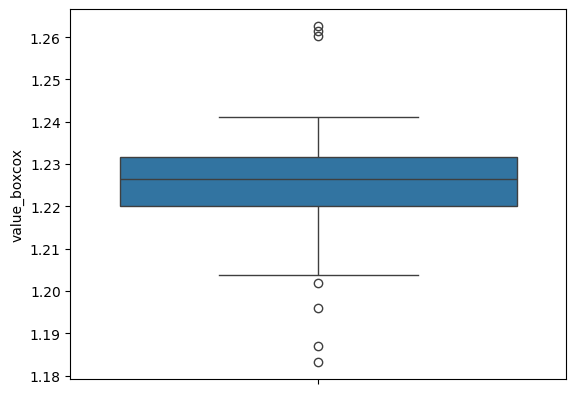

In [26]:
sns.boxplot(df_trasnformed["value_boxcox"])

<Axes: ylabel='value_sqrt'>

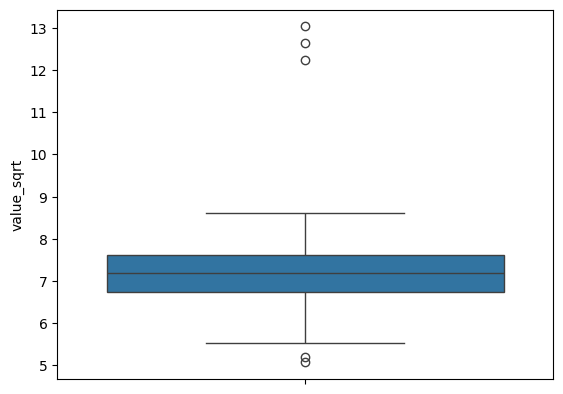

In [25]:
sns.boxplot(df_trasnformed["value_sqrt"])

<Axes: ylabel='value_log'>

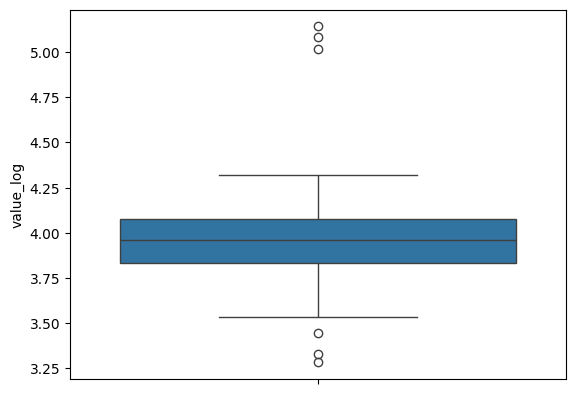

In [24]:
sns.boxplot(df_trasnformed["value_log"])

# 4. Encoding catgorical variables

In [27]:
df = pd.DataFrame({'color' : ['red', 'green', 'blue', 'green', 'blue', 'red', 'blue']})
print(f"Original df:\n {df}")

Original df:
    color
0    red
1  green
2   blue
3  green
4   blue
5    red
6   blue


In [28]:
# label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["color_label_encodered"] = label_encoder.fit_transform(df[["color"]])
print(f"df after applying label encoder:\n {df}")

df after applying label encoder:
    color  color_label_encodered
0    red                      2
1  green                      1
2   blue                      0
3  green                      1
4   blue                      0
5    red                      2
6   blue                      0


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
# one hot encoder
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)
df[["blue", "green", "red"]] = onehot_encoder.fit_transform(df[["color"]])
print(f"df after applying one hot encoder:\n {df}")

df after applying one hot encoder:
    color  color_label_encodered  blue  green  red
0    red                      2   0.0    0.0  1.0
1  green                      1   0.0    1.0  0.0
2   blue                      0   1.0    0.0  0.0
3  green                      1   0.0    1.0  0.0
4   blue                      0   1.0    0.0  0.0
5    red                      2   0.0    0.0  1.0
6   blue                      0   1.0    0.0  0.0


In [30]:
# pandas dummies
df_dummies = pd.get_dummies(df, columns=['color'], dtype="int")
print(f"df after applying pandas dummies:\n {df_dummies}")

df after applying pandas dummies:
    color_label_encodered  blue  green  red  color_blue  color_green  color_red
0                      2   0.0    0.0  1.0           0            0          1
1                      1   0.0    1.0  0.0           0            1          0
2                      0   1.0    0.0  0.0           1            0          0
3                      1   0.0    1.0  0.0           0            1          0
4                      0   1.0    0.0  0.0           1            0          0
5                      2   0.0    0.0  1.0           0            0          1
6                      0   1.0    0.0  0.0           1            0          0


In [31]:
# ordinal encoder
data = pd.DataFrame({'size' : ['junior', 'senior', 'lead', 'senior', 'junior', 'lead']})
print(f"original data:\n{data}")

original data:
     size
0  junior
1  senior
2    lead
3  senior
4  junior
5    lead


In [32]:
# ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[["junior", "senior", "lead"]])
data["color_ordinal_encoded"] = encoder.fit_transform(data[['size']])
print(f"data after applying ordinal encoder:\n{data}")

data after applying ordinal encoder:
     size  color_ordinal_encoded
0  junior                    0.0
1  senior                    1.0
2    lead                    2.0
3  senior                    1.0
4  junior                    0.0
5    lead                    2.0


## 5. Standardization (Standard scaler)
$$X_{new} = \frac{X_i - X_{mean}} {X_{std}}$$

- ***Effect***: Centers near mean of 0, and makes std $\approx$ 1 (shape same, axis rescaled);
- Sensitive to outliers

In [33]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [34]:
# creating list
np.random.seed(7)
x = list(np.random.normal(20, 2.0, 600))
# adding outliers
x.append(50)
x.append(48)
x.append(52)

In [35]:
# separating each value of each index to a list;
# format required by te standard scaler
col = []
i = 0
n = len(x)
while i < n:
    col.append([x[i]])
    i += 1

In [36]:
print(f"x:\n {x[:5]}")
print(f"x after values separation:\n {col[:5]}")

x:
 [np.float64(23.38105140760071), np.float64(19.068125258918336), np.float64(20.06564032735717), np.float64(20.815032565993015), np.float64(18.422153942748523)]
x after values separation:
 [[np.float64(23.38105140760071)], [np.float64(19.068125258918336)], [np.float64(20.06564032735717)], [np.float64(20.815032565993015)], [np.float64(18.422153942748523)]]


In [37]:
# standard scaler
std_scaler = StandardScaler()
col_std = std_scaler.fit_transform(col)
# converting col_std to list of lists for plotting
x_std = []
i = 0
while i < n:
    x_std.append(float(col_std[i][0]))
    i += 1

In [38]:
print(f"Output of the standatrd scaler: {col_std[:5]}")
print(f"\nOutput of standard scaler after combining them into one list:\n {x_std[:5]}")

Output of the standatrd scaler: [[ 1.15742522]
 [-0.33874188]
 [ 0.00729911]
 [ 0.26726554]
 [-0.56283128]]

Output of standard scaler after combining them into one list:
 [1.1574252185016114, -0.338741880493066, 0.007299107620203243, 0.267265537147743, -0.5628312798542929]


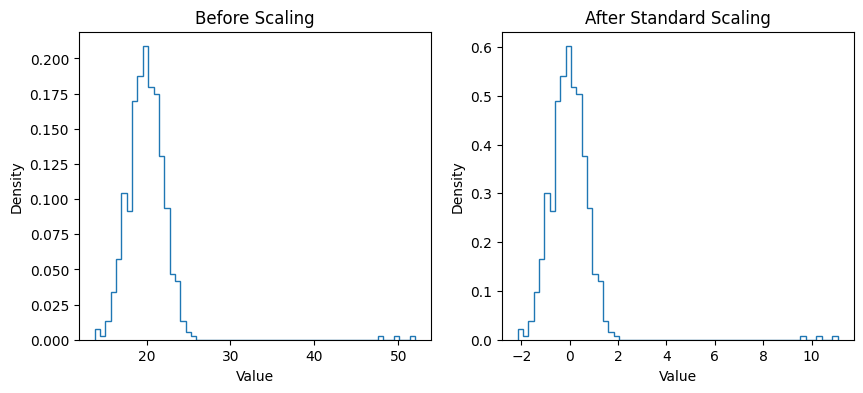

In [39]:
# effect of standard scaler
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(x,     bins=60, density=True, histtype="step")
ax[0].set_title("Before Scaling")
ax[0].set_xlabel("Value")
ax[0].set_ylabel("Density")

ax[1].hist(x_std, bins=60, density=True, histtype="step")
ax[1].set_title("After Standard Scaling")
ax[1].set_xlabel("Value")
ax[1].set_ylabel("Density")

plt.show()

## 6. Scaling (Min-Max Scaler)
$$X_{new} = \frac{X_i - \min(X)} {\max(X) - \min(X)}$$

***Effect***: Squeexes data into [0, 1] (outliers push most values toward the middle)

In [40]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
col_minmax = minmax_scaler.fit_transform(col)

In [41]:
x_mm = []
i = 0
while i < n:
    x_mm.append(float(col_minmax[i][0]))
    i += 1

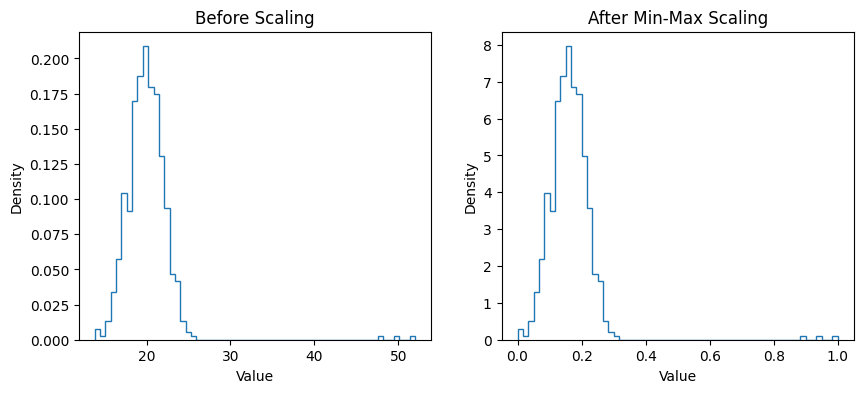

In [42]:
# effect of min-max scaler
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(x,    bins=60, density=True, histtype="step")
ax[0].set_title("Before Scaling"); ax[0].set_xlabel("Value"); ax[0].set_ylabel("Density")
ax[1].hist(x_mm, bins=60, density=True, histtype="step")
ax[1].set_title("After Min-Max Scaling"); ax[1].set_xlabel("Value"); ax[1].set_ylabel("Density")
plt.show()

## 7. Robust scaler
$$X_{new} = \frac{X_i - X_{median}} {IQR}$$
- Less sensitive to outliers.

In [43]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
col_rob = rob_scaler.fit_transform(col)

In [44]:
x_rob = []
i = 0
while i < n:
    x_rob.append(float(col_rob[i][0]))
    i += 1

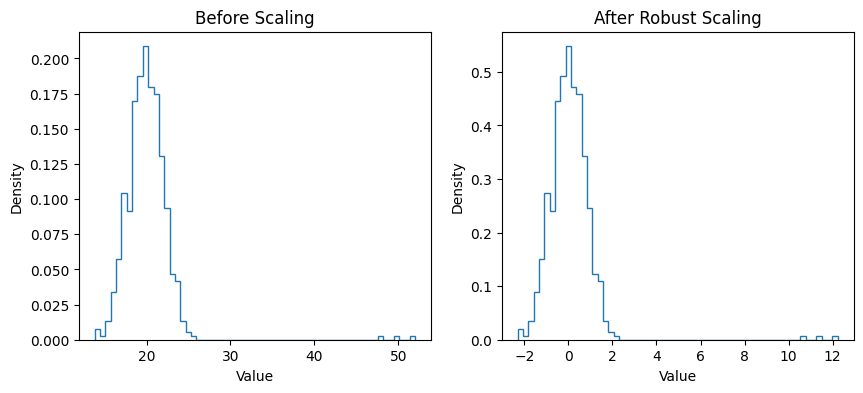

In [45]:
# effect of robust scaler
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(x,     bins=60, density=True, histtype="step")
ax[0].set_title("Before Scaling"); ax[0].set_xlabel("Value"); ax[0].set_ylabel("Density")
ax[1].hist(x_rob, bins=60, density=True, histtype="step")
ax[1].set_title("After Robust Scaling"); ax[1].set_xlabel("Value"); ax[1].set_ylabel("Density")
plt.show()